In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [29]:
data = pd.read_csv('/content/drive/MyDrive/IPL Player Stats - 2016 till 2019.csv')


In [30]:
data.head()


,Team,Player,Tournament,Matches,Batting Innings,Not Out,Runds Scored,Highest Score,Batting Average,Balls Faced,...,Runs Conceded,Wickets Taken,Best Bowling Figures,Bowling Average,Bowling Economy Rate,Bowling Strike Rate,4+ Innings Wickets,5+ Innings Wickets,Catches Taken,Stumpings Made
0,Delhi Daredevils,CH Morris,IPL 2016,12,7,4,195,82*,65.00,109,...,308,13,2/30,23.69,7.00,20.3,0,0,8,0
1,Delhi Daredevils,CH Morris,IPL 2017,9,9,4,154,52*,30.80,94,...,240,12,4/26,20.00,7.74,15.5,1,0,5,0
2,Delhi Daredevils,CH Morris,IPL 2018,4,4,3,46,27*,46.00,26,...,143,3,2/41,47.66,10.21,28.0,0,0,2,0
3,Delhi Daredevils,JP Duminy,IPL 2016,10,8,3,191,49*,38.20,156,...,55,2,1/4,27.50,7.85,21.0,0,0,3,0
4,Delhi Daredevils,Q de Kock,IPL 2016,13,13,1,445,108,37.08,327,...,-,-,-,-,-,-,-,-,2,2


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Team                  631 non-null    object
 1   Player                631 non-null    object
 2   Tournament            631 non-null    object
 3   Matches               631 non-null    int64 
 4   Batting Innings       631 non-null    object
 5   Not Out               631 non-null    object
 6   Runds Scored          631 non-null    object
 7   Highest Score         631 non-null    object
 8   Batting Average       631 non-null    object
 9   Balls Faced           631 non-null    object
 10  Batting Strike Rate   631 non-null    object
 11  100                   631 non-null    object
 12  50                    631 non-null    object
 13  0                     631 non-null    object
 14  4s                    631 non-null    object
 15  6s                    631 non-null    ob

In [32]:
ipl = pd.read_csv('/content/drive/MyDrive/ipl_dataset.csv')

In [33]:
data['Player'].unique().shape

(268,)

In [34]:
ipl['striker'].unique().shape

(235,)

In [35]:
new_ipl = pd.merge(ipl,data,left_on='striker',right_on='Player')

In [36]:
new_ipl.drop(['wicket_type', 'player_dismissed','Unnamed: 0','match_id'],axis=1,inplace=True)

In [37]:
new_ipl.head()

,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,...,Runs Conceded,Wickets Taken,Best Bowling Figures,Bowling Average,Bowling Economy Rate,Bowling Strike Rate,4+ Innings Wickets,5+ Innings Wickets,Catches Taken,Stumpings Made
0,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,...,-,-,-,-,-,-,-,-,1,0
1,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,...,-,-,-,-,-,-,-,-,0,0
2,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,...,-,-,-,-,-,-,-,-,8,0
3,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,1.0,...,-,-,-,-,-,-,-,-,1,0
4,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,1.0,...,-,-,-,-,-,-,-,-,0,0


In [ ]:
new_ipl.columns

In [39]:
listf = []
for c in new_ipl.columns:
    if new_ipl[c].dtype==object:
        print(c,"->" ,new_ipl[c].dtype)
        listf.append(c)

venue -> object
batting_team -> object
bowling_team -> object
striker -> object
non_striker -> object
bowler -> object
Team -> object
Player -> object
Tournament -> object
Batting Innings -> object
Not Out -> object
Runds Scored -> object
Highest Score -> object
Batting Average -> object
Balls Faced -> object
Batting Strike Rate -> object
100 -> object
50 -> object
0 -> object
4s -> object
6s -> object
Bowling Innings -> object
Overs Bowled -> object
Maidens Bowled -> object
Runs Conceded -> object
Wickets Taken -> object
Best Bowling Figures -> object
Bowling Average -> object
Bowling Economy Rate -> object
Bowling Strike Rate -> object
4+ Innings Wickets -> object
5+ Innings Wickets -> object


In [40]:
def labelEncoding(data):
    dataset = pd.DataFrame(new_ipl)
    feature_dict ={}
    #features={}
    for feature in dataset:
        if dataset[feature].dtype==object:
            le = preprocessing.LabelEncoder()
            fs = dataset[feature].unique()
            le.fit(fs)
            dataset[feature] = le.transform(dataset[feature])
            feature_dict[feature] = le
            print(feature)
    return dataset

labelEncoding(new_ipl)


venue
batting_team
bowling_team
striker
non_striker
bowler
Team
Player
Tournament
Batting Innings
Not Out
Runds Scored
Highest Score
Batting Average
Balls Faced
Batting Strike Rate
100
50
0
4s
6s
Bowling Innings
Overs Bowled
Maidens Bowled
Runs Conceded
Wickets Taken
Best Bowling Figures
Bowling Average
Bowling Economy Rate
Bowling Strike Rate
4+ Innings Wickets
5+ Innings Wickets


,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,...,Runs Conceded,Wickets Taken,Best Bowling Figures,Bowling Average,Bowling Economy Rate,Bowling Strike Rate,4+ Innings Wickets,5+ Innings Wickets,Catches Taken,Stumpings Made
0,15,1,0.2,7,13,13,164,197,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,15,1,0.2,7,13,13,164,197,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,15,1,0.2,7,13,13,164,197,0.0,0.0,...,0,0,0,0,0,0,0,0,8,0
3,15,1,0.3,7,13,13,164,197,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
4,15,1,0.3,7,13,13,164,197,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75403,8,1,6.2,13,7,4,193,20,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
75404,8,1,6.6,13,7,4,193,20,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
75405,8,1,6.6,13,7,4,193,20,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
75406,8,1,6.6,13,7,4,193,20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# Feature enginneering.

X = new_ipl.drop('y',axis=1).values
y = new_ipl['y'].values

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.preprocessing import MinMaxScaler
# Scaling the data using MinMaxScaler which is important when we deal with neural nets

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
# Can't fit the X_test because it should not be scaled as it is to be predicted

X_test = scaler.transform(X_test)

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [45]:
X_train.shape

(50523, 42)

In [46]:
from tensorflow.keras.callbacks import EarlyStopping

In [47]:
early_stop = EarlyStopping(monitor='val_loss',patience=25,verbose=1, mode='min',)

In [48]:
model = Sequential()

model.add(Dense(43, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(22, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(11, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
# used loss=mse(mean squared error) because it a regression task.

In [49]:
model.fit(x=X_train, y=y_train, epochs=400, validation_data=(X_test,y_test),callbacks=[early_stop] )

Epoch 1/400
1579/1579 [==============================] - 6s 3ms/step - loss: 951.0427 - val_loss: 257.1813
Epoch 2/400
1579/1579 [==============================] - 5s 3ms/step - loss: 665.9908 - val_loss: 187.9642
Epoch 3/400
1579/1579 [==============================] - 7s 4ms/step - loss: 567.8955 - val_loss: 177.2724
Epoch 4/400
1579/1579 [==============================] - 6s 4ms/step - loss: 483.3966 - val_loss: 156.2101
Epoch 5/400
1579/1579 [==============================] - 5s 3ms/step - loss: 456.3273 - val_loss: 156.6086
Epoch 6/400
1579/1579 [==============================] - 6s 4ms/step - loss: 423.3770 - val_loss: 152.3346
Epoch 7/400
1579/1579 [==============================] - 7s 5ms/step - loss: 390.3263 - val_loss: 108.6996
Epoch 8/400
1579/1579 [==============================] - 7s 4ms/step - loss: 369.1985 - val_loss: 141.1297
Epoch 9/400
1579/1579 [==============================] - 5s 3ms/step - loss: 341.5178 - val_loss: 114.7800
Epoch 10/400
1579/1579 [=============

In [50]:
model_losses = pd.DataFrame(model.history.history)

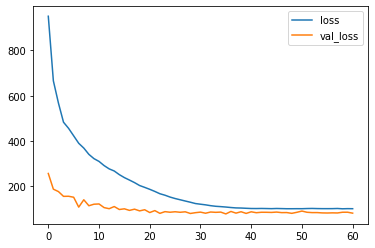

In [51]:
model_losses.plot()

In [52]:
predictions = model.predict(X_test)

In [53]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score

In [54]:
mean_absolute_error(y_test,predictions)

6.847523388164168

In [55]:
np.sqrt(mean_squared_error(y_test,predictions))

9.057633110130554

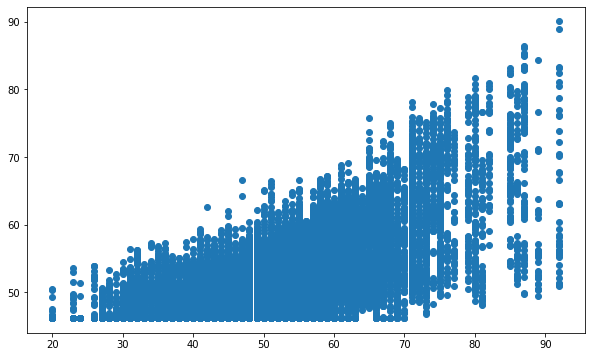

In [56]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,predictions)

In [57]:
sample = pd.DataFrame(predictions,columns=['Predict'])
sample['Actual']=y_test

In [58]:

sample.head(10)

,Predict,Actual
0,46.225704,49.0
1,46.225704,47.0
2,46.225704,37.0
3,61.903458,63.0
4,52.164745,57.0
5,56.575825,59.0
6,47.261211,37.0
7,46.225704,47.0
8,52.252720,45.0
9,52.529598,56.0
